### CREATE CLIMATE NORMALS FOR A COUNTRY ###

**Uses meteostat**

In [115]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point as meteo_Point
from meteostat import Daily as meteo_Daily

In [116]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
import os
import pickle
import requests

**Write a function to download data according to the country, always level0 or level1 for the largest ones (i.e. USA)**

In [117]:
import pycountry

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon

In [119]:
import time

**point in polygon business**

In [120]:
def getGeoJson(country_name):
    cn = pycountry.countries.get(name=country_name)
    country_code_3 = cn.alpha_3          
    url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/"
    cmd = "wget %s/gadm41_%s_0.json"%(url,country_code_3)
    os.system(cmd)
    return "gadm41_%s_0.json"%(country_code_3)

In [121]:


def Random_Points_in_Bounds(polygon, number):   
    minx, miny, maxx, maxy = polygon.bounds.values[0]
    x = np.random.uniform( minx, maxx, number )
    y = np.random.uniform( miny, maxy, number )
    return x, y

In [122]:
def getPointsInPolygon(shp, number=2000):
    x,y = Random_Points_in_Bounds(shp.geometry, number)
    df = pd.DataFrame()
    df['points'] = list(zip(x,y))
    df['points'] = df['points'].apply(Point)
    gdf_points = gpd.GeoDataFrame(df, geometry='points')
    Sjoin = gpd.tools.sjoin(gdf_points, shp, predicate="within", how='left')

    # Keep points in "myPoly"
    pnts_in_poly = gdf_points[Sjoin.index_right==0.]
    return pnts_in_poly

**check the results**

In [123]:
def plotGeo(shp,pnts_in_poly):
    fig = plt.figure(figsize=(12,10))
    ax = plt.gca()
    base = shp.boundary.plot(linewidth=1, edgecolor="black", ax = ax)
    pnts_in_poly.plot(ax=base, linewidth=1, color="red", markersize=1)
    plt.show()


In [124]:
def climateNormalsDaily(data):
    data = data.assign(tmp = data.index)
    data = data.assign(month_day = data.tmp.dt.strftime("%m-%d"))
    return data

In [ ]:
country_name = 'Spain' ## check gadm.org

get the polygon

In [130]:
#geojfile = getGeoJson('Spain')
shp = gpd.read_file(geojfile)
pnts_in_poly = getPointsInPolygon(shp,10000)

Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326



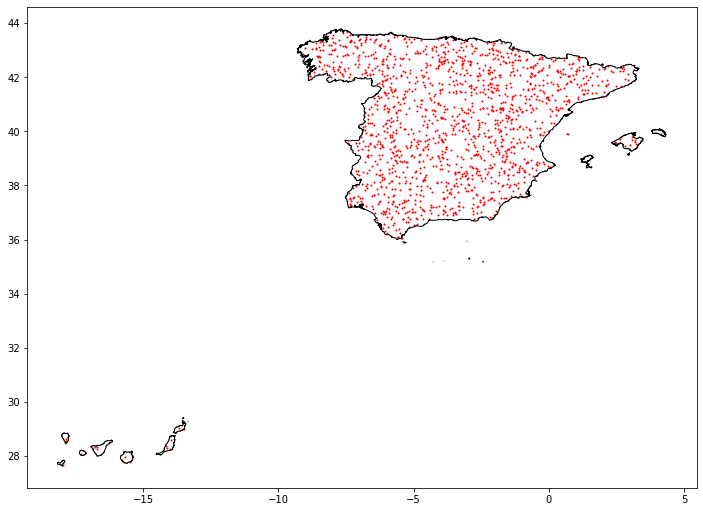

In [131]:
plotGeo(shp,pnts_in_poly)

**Get point by point all 2000 candidates**

In [132]:

def getElevationUSGS(lat,lon):
    url = "https://api.opentopodata.org/v1/srtm90m"
    data = {'interpolation': 'cubic', 'locations': '%.5f,%.5f'%(lat,lon)}
    response = requests.post(url, data=data)
    js = response.json()
    elev = js['results'][0]['elevation']
    return elev

In [133]:
def getClimateNormals(pnts_in_poly, limit=True):
    allDataNormals = []
    
    if(limit): ## only 10 points as a test default
        mmin,mmax = 1,10
        vector_of_points = pnts_in_poly[mmin:mmax].points
    else:
        vector_of_points = pnts_in_poly.points
        
        
    for pnum, p in enumerate(vector_of_points): 
    
        lat = p.y
        lon = p.x
        start = datetime(2008, 1, 1)
        end = datetime(2022, 12, 31)
        point_meteostat = meteo_Point(lat,lon)
        data = []
        elev = getElevationUSGS(lat,lon)
        try:
            try:
                data = meteo_Daily(point_meteostat, start, end)
                data = data.fetch()
            except Exception as e:
                print(str(e))
                pass
            if(len(data) >0):
                data = climateNormalsDaily(data)
                data_mean = data.groupby('month_day').mean() ## climate normal
                data_mean = data_mean.assign(elevation = elev)
                data_mean = data_mean.assign(pnum = pnum)
                data_mean = data_mean.assign(lat = lat)
                data_mean = data_mean.assign(lon = lon)
                allDataNormals.append(data_mean)

        except Exception as e:
            time.sleep(2)
        
        time.sleep(1) ## we need to be polite with them, avoiding massive downloads in a short time
        if(pnum%10 == 0 and pnum >0):
            pickle.dump(allDataNormals, open("allDataNormals_tmp.pickle","wb"))
            print("Done", pnum)
        
    pickle.dump(allDataNormals, open("allDataNormals_tmp.pickle","wb"))
    return pd.concat(allDataNormals)
    

In [135]:
dfT = getClimateNormals(pnts_in_poly,False) ## warnings are normal

Done 10
Done 20


Done 30
Done 40
Done 50
Done 60


Done 70
Done 80
Done 90
Done 100
Done 110
Done 120


Done 130
Done 140
Done 150
Done 160


Done 170
Done 180
Done 190
Done 200


Done 210
Done 220
Done 230
Done 240
Done 250
Done 260
Done 270
Done 280
Done 290
Done 300
Done 310
Done 320
Done 330
Done 340
Done 350
Done 360
Done 370
Done 380
Done 390
Done 400
Done 410
Done 420
Done 430
Done 440
Done 450
Done 460
Done 470
Done 480
Done 490
Done 500
Done 510
Done 520


Done 530
Done 540
Done 550
Done 560
Done 570
Done 580
Done 590
Done 600
Done 610
Done 620
Done 630
Done 640
Done 650
Done 660
Done 670
Done 680
Done 690
Done 700
Done 710
Done 720
Done 730
Done 740
Done 750
Done 760
Done 770
Done 780
Done 790
Done 800
Done 810
Done 820
Done 830
Done 840
Done 850
Done 860
Done 870
Done 880
Done 890
Done 900
Done 910
Done 920
Done 930
Done 940
Done 950
Done 960
Done 970
Done 980
Done 990
Done 1000
Done 1010
Done 1020
Done 1030
Done 1040
Done 1050
Done 1060
Done 1070
Done 1080
Done 1090
Done 1100
Done 1110
Done 1120
Done 1130
Done 1140
Done 1150
Done 1160
Done 1170
Done 1180
Done 1190
Done 1200
Done 1210
Done 1220
Done 1230
Done 1240
Done 1250
Done 1260
Done 1270
Done 1280
Done 1290
Done 1300
Done 1310
Done 1320
Done 1330
Done 1340
Done 1350
Done 1360
Done 1370
Done 1380
Done 1390
Done 1400
Done 1410
Done 1420
Done 1430
Done 1440
Done 1450
Done 1460
Done 1470
Done 1480
Done 1490
Done 1500
Done 1510
Done 1520


In [136]:
dfT = dfT.to_pickle("WeatherAndClimateData/ClimateNormals_%s.pickle.gz"%(country_name))